<a href="https://www.kaggle.com/code/udaybansal01022004/predictive-and-validation?scriptVersionId=238589808" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV,TimeSeriesSplit
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error
from sklearn.ensemble import VotingRegressor,StackingRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
ds1=pd.read_csv("/kaggle/input/scaled/Scaled.csv")
ds1

,Date,Open,High,Low,Close,Volume,Tomorrow,Stock name,Yfinance ticker,Zerodha token
0,2010-01-04,-0.823037,-0.822634,-0.822972,-0.822650,-0.697873,30.263664,Baja Finance,BAJFINANCE.NS,81153
1,2010-01-04,-0.366181,-0.367472,-0.360584,-0.363668,-0.649173,606.428955,Larsen & Toubro (L&T),LT.NS,2939649
2,2010-01-04,-0.686265,-0.685837,-0.685961,-0.684542,-0.645445,205.466766,Kotak Mahindra Bank,KOTAKBANK.NS,492033
3,2010-01-04,-0.609498,-0.610896,-0.608675,-0.610621,-0.575081,296.118103,Tata Consultancy Services (TCS),TCS.NS,2953217
4,2010-01-04,-0.659808,-0.660541,-0.658831,-0.659807,-0.402440,235.218887,Infosys,INFY.NS,408065
...,...,...,...,...,...,...,...,...,...,...
36975,2024-12-27,1.022123,1.004572,1.032624,1.022248,-0.690432,2343.500000,Hindustan Unilever (HUL),HINDUNILVR.NS,356865
36976,2024-12-27,-0.195539,-0.200938,-0.203294,-0.208545,0.137110,788.299988,State Bank of India (SBI),SBIN.NS,779521
36977,2024-12-27,0.676294,0.671889,0.690073,0.683332,-0.413244,1906.000000,Infosys,INFY.NS,408065
36978,2024-12-27,4.614294,4.659776,4.666916,4.668080,-0.690547,6888.250000,Baja Finance,BAJFINANCE.NS,81153


In [3]:
Y = ds1["Tomorrow"]
X = ds1.drop(columns={"Date","Stock name","Yfinance ticker","Zerodha token","Tomorrow"})
Y

0          30.263664
1         606.428955
2         205.466766
3         296.118103
4         235.218887
            ...     
36975    2343.500000
36976     788.299988
36977    1906.000000
36978    6888.250000
36979    4148.912598
Name: Tomorrow, Length: 36980, dtype: float64

In [4]:
X

,Open,High,Low,Close,Volume
0,-0.823037,-0.822634,-0.822972,-0.822650,-0.697873
1,-0.366181,-0.367472,-0.360584,-0.363668,-0.649173
2,-0.686265,-0.685837,-0.685961,-0.684542,-0.645445
3,-0.609498,-0.610896,-0.608675,-0.610621,-0.575081
4,-0.659808,-0.660541,-0.658831,-0.659807,-0.402440
...,...,...,...,...,...
36975,1.022123,1.004572,1.032624,1.022248,-0.690432
36976,-0.195539,-0.200938,-0.203294,-0.208545,0.137110
36977,0.676294,0.671889,0.690073,0.683332,-0.413244
36978,4.614294,4.659776,4.666916,4.668080,-0.690547


In [5]:
X_train = X.iloc[:25889]
X_test = X.iloc[25890:]


In [6]:
X_train


,Open,High,Low,Close,Volume
0,-0.823037,-0.822634,-0.822972,-0.822650,-0.697873
1,-0.366181,-0.367472,-0.360584,-0.363668,-0.649173
2,-0.686265,-0.685837,-0.685961,-0.684542,-0.645445
3,-0.609498,-0.610896,-0.608675,-0.610621,-0.575081
4,-0.659808,-0.660541,-0.658831,-0.659807,-0.402440
...,...,...,...,...,...
25884,0.242789,0.234714,0.240871,0.242127,-0.443024
25885,0.773419,0.756362,0.774839,0.758773,-0.570900
25886,-0.566734,-0.558407,-0.564267,-0.556752,3.038068
25887,0.002819,-0.004480,0.000214,0.000049,0.262158


In [7]:
X_test

,Open,High,Low,Close,Volume
25890,-0.188798,-0.191956,-0.193481,-0.197908,1.412437
25891,1.788363,1.804975,1.683321,1.677427,0.832105
25892,0.757111,0.769996,0.754754,0.782552,-0.461419
25893,0.849911,0.835314,0.823033,0.813029,-0.507054
25894,-0.277203,-0.283332,-0.279853,-0.284406,-0.041071
...,...,...,...,...,...
36975,1.022123,1.004572,1.032624,1.022248,-0.690432
36976,-0.195539,-0.200938,-0.203294,-0.208545,0.137110
36977,0.676294,0.671889,0.690073,0.683332,-0.413244
36978,4.614294,4.659776,4.666916,4.668080,-0.690547


In [8]:
Y_train = Y.iloc[:25889]
Y_test = Y.iloc[25890:]

In [9]:
Y_train

0          30.263664
1         606.428955
2         205.466766
3         296.118103
4         235.218887
            ...     
25884    1348.675293
25885    2041.025635
25886     356.648743
25887    1065.912231
25888    3161.879150
Name: Tomorrow, Length: 25889, dtype: float64

In [10]:
Y_test

25890     824.841980
25891    3282.073975
25892    2031.502075
25893    2065.565186
25894     710.999268
            ...     
36975    2343.500000
36976     788.299988
36977    1906.000000
36978    6888.250000
36979    4148.912598
Name: Tomorrow, Length: 11090, dtype: float64

In [11]:
tscv = TimeSeriesSplit(n_splits=5)

In [12]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((25889, 5), (11090, 5), (25889,), (11090,))

In [13]:
svr_pipeline = Pipeline([("scaler", StandardScaler()),("SVR",SVR())])
rfr_pipeline = Pipeline([("scaler", StandardScaler()),("RFR",RandomForestRegressor(random_state=42))])
gbr_pipeline = Pipeline([("scaler", StandardScaler()),("GBR",GradientBoostingRegressor(random_state=42))])
xgb_pipeline = Pipeline([("scaler", StandardScaler()),("XGBR",XGBRegressor(random_state=42))])

svrparam_grid={
        "SVR__kernel": ['rbf'],
        "SVR__gamma": ["scale", "auto"],
        "SVR__C": [0.5, 1, 5],
        "SVR__epsilon": [0.01, 0.05, 0.1]
    }
rfrparam_grid={
        'RFR__n_estimators': [i for i in range(100,501,100)],
        'RFR__max_depth': [5, 10, 15, None],
        'RFR__min_samples_split': [2, 5, 10],
        'RFR__min_samples_leaf': [i for i in range(3,10)]
    }
gbrparam_grid={
        'GBR__n_estimators': [i for i in range(100,501,100)],
        'GBR__learning_rate': [0.01, 0.05, 0.1,0.5],
        'GBR__max_depth': [3, 4, 5, 10],
        'GBR__subsample': [0.8, 1.0],
        "GBR__criterion":["friedman_mse","squared_error"]
    }
xgbparam_grid={
        'XGBR__n_estimators': [100, 200, 300],
        'XGBR__max_depth': [3, 4, 5, 6, 7],
        'XGBR__learning_rate': [0.01, 0.05, 0.1, 0.2],
        'XGBR__subsample': [0.6, 0.8, 1.0],
        'XGBR__colsample_bytree': [0.6, 0.8, 1.0],
        'XGBR__gamma': [0, 0.1, 0.2, 0.3],
        'XGBR__reg_alpha': [0, 0.01, 0.1],
        'XGBR__reg_lambda': [1, 1.5, 2],
    }


svrSearch=RandomizedSearchCV(estimator=svr_pipeline, param_distributions=svrparam_grid, cv=tscv, n_iter=5, n_jobs=-1,scoring="neg_mean_squared_error")

rfrSearch=RandomizedSearchCV(estimator=rfr_pipeline, param_distributions=rfrparam_grid, cv=tscv, n_iter=5, n_jobs=-1,scoring="neg_mean_squared_error")

gbrSearch=RandomizedSearchCV(estimator=gbr_pipeline, param_distributions=gbrparam_grid, cv=tscv, n_iter=5, n_jobs=-1,scoring="neg_mean_squared_error")

xgbSearch=RandomizedSearchCV(estimator=xgb_pipeline, param_distributions=xgbparam_grid, cv=tscv, n_iter=5, n_jobs=-1,scoring="neg_mean_squared_error")


models = {
    "SVR":svrSearch,
    "RFR":rfrSearch,
    "GBR":gbrSearch,
    "XGBR":xgbSearch
    }



In [14]:
results=[]
for name,model in models.items():
  print(f"{name} is being tuned...\n")
  model.fit(X_train,Y_train)


SVR is being tuned...

RFR is being tuned...

GBR is being tuned...

XGBR is being tuned...



In [15]:
voting=VotingRegressor(estimators=[("svr",svrSearch.best_estimator_),
 ("rfr",rfrSearch.best_estimator_),("xgbr",xgbSearch.best_estimator_)]) 

stacking=StackingRegressor(estimators=[("rfr",rfrSearch.best_estimator_),("gbr",gbrSearch.best_estimator_),("xgbr",xgbSearch.best_estimator_)],final_estimator=GradientBoostingRegressor(random_state=42))

In [16]:
stacking.fit(X_train,Y_train)

StackingRegressor(estimators=[('rfr',
                               Pipeline(steps=[('scaler', StandardScaler()),
                                               ('RFR',
                                                RandomForestRegressor(max_depth=10,
                                                                      min_samples_leaf=3,
                                                                      n_estimators=200,
                                                                      random_state=42))])),
                              ('gbr',
                               Pipeline(steps=[('scaler', StandardScaler()),
                                               ('GBR',
                                                GradientBoostingRegressor(max_depth=5,
                                                                          n_estimators=200,
                                                                          random_state=42,
                                                                          subsample=0.8))])),
                              ('xgbr',
                               Pipeline(steps...
                                                             interaction_constraints=None,
                                                             learning_rate=0.1,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=4,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=200,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...))]))],
                  final_estimator=GradientBoostingRegressor(random_state=42))

In [17]:
voting.fit(X_train,Y_train)

VotingRegressor(estimators=[('svr',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('SVR', SVR(C=5, gamma='auto'))])),
                            ('rfr',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('RFR',
                                              RandomForestRegressor(max_depth=10,
                                                                    min_samples_leaf=3,
                                                                    n_estimators=200,
                                                                    random_state=42))])),
                            ('xgbr',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('XGBR',
                                              XGBRegressor(base_score=None...
                                                           grow_policy=None,
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                           learning_rate=0.1,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=4,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=200,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=42, ...))]))])

In [18]:
models["Voting"]=voting
models["Stacking"]=stacking

In [19]:
models

{'SVR': RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                    estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                              ('SVR', SVR())]),
                    n_iter=5, n_jobs=-1,
                    param_distributions={'SVR__C': [0.5, 1, 5],
                                         'SVR__epsilon': [0.01, 0.05, 0.1],
                                         'SVR__gamma': ['scale', 'auto'],
                                         'SVR__kernel': ['rbf']},
                    scoring='neg_mean_squared_error'),
 'RFR': RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                    estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                              ('RFR',
                                               RandomForestRegressor(random_state=42))]),
                    n_iter=5, n_jobs=-1,
                 

In [20]:
results_dict = {}

for name, model in models.items():
    Y_preds = model.predict(X_test)

    # Print evaluation metrics
    print(f"{name}...")
    MAE = mean_absolute_error(Y_test, Y_preds)
    MSE = mean_squared_error(Y_test, Y_preds)
    RMSE= math.sqrt(MSE)
    MLE = mean_squared_log_error(Y_test, Y_preds)
    R2 = r2_score(Y_test, Y_preds)

    print(f"MEAN ABSOLUTE ERROR: {MAE}")
    print(f"MEAN SQUARED ERROR: {MSE}")
    print(f"ROOT MEAN SQUARED ERROR: {RMSE}")
    print(f"MEAN SQUARED LOG ERROR: {MLE}")
    print(f"R2 SCORE: {R2}")
    print("-------------------------------------------------------------------\n")

    results_dict[name] = Y_preds.tolist()  # Convert to list to ensure compatibility

# Create DataFrame using from_dict with orient='index'
results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[f'Pred_{i}' for i in range(len(Y_preds))])


SVR...
MEAN ABSOLUTE ERROR: 732.6650592797021
MEAN SQUARED ERROR: 3194091.777822802
ROOT MEAN SQUARED ERROR: 1787.2022207413468
MEAN SQUARED LOG ERROR: 0.3530894169668467
R2 SCORE: -0.13039425929530757
-------------------------------------------------------------------

RFR...
MEAN ABSOLUTE ERROR: 195.01308337043193
MEAN SQUARED ERROR: 391336.48715887347
ROOT MEAN SQUARED ERROR: 625.5689307813117
MEAN SQUARED LOG ERROR: 0.01186026877558443
R2 SCORE: 0.8615053826541226
-------------------------------------------------------------------

GBR...
MEAN ABSOLUTE ERROR: 193.85786505169568
MEAN SQUARED ERROR: 383819.27645244927
ROOT MEAN SQUARED ERROR: 619.5314975466939
MEAN SQUARED LOG ERROR: 0.011592856985494202
R2 SCORE: 0.8641657357120573
-------------------------------------------------------------------

XGBR...
MEAN ABSOLUTE ERROR: 262.5923748982931
MEAN SQUARED ERROR: 601586.6779678544
ROOT MEAN SQUARED ERROR: 775.6201892471948
MEAN SQUARED LOG ERROR: 0.020772035390307177
R2 SCORE: 0.7

In [21]:
results_df["Predicted_Values"] = results_df.values.tolist() # Convert DataFrame values to a list of lists
results_df = results_df.reset_index()
results_df = results_df[["index", "Predicted_Values"]]
results_df.columns = ["Model", "Predicted_Values"]

In [22]:
results_df=results_df[results_df["Model"]!="Predicted_Values"]
results_df

,Model,Predicted_Values
0,SVR,"[816.2466715673853, 1719.578815654334, 2018.93..."
1,RFR,"[820.5229019666205, 3210.499074876778, 2038.81..."
2,GBR,"[823.6082794796573, 3148.698897059223, 2034.64..."
3,XGBR,"[822.4525756835938, 3551.101318359375, 2035.74..."
4,Voting,"[819.7407164058665, 2827.059736296829, 2031.16..."
5,Stacking,"[822.896209544769, 1834.2139304997318, 2148.38..."


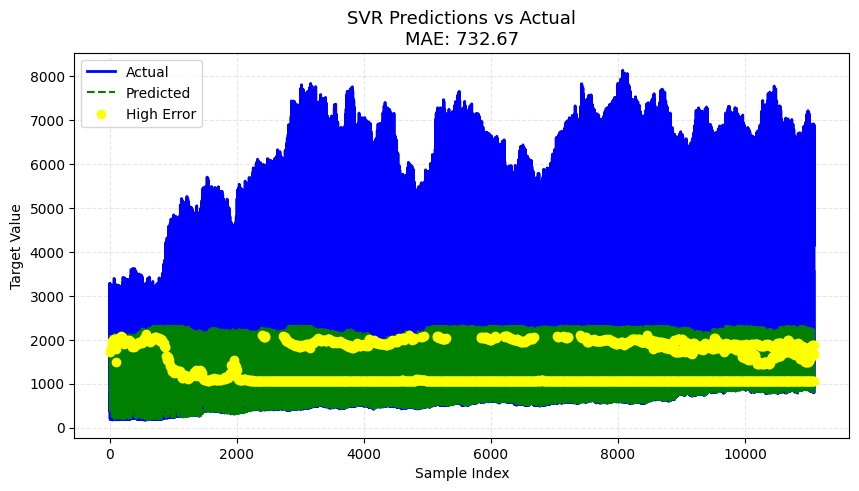

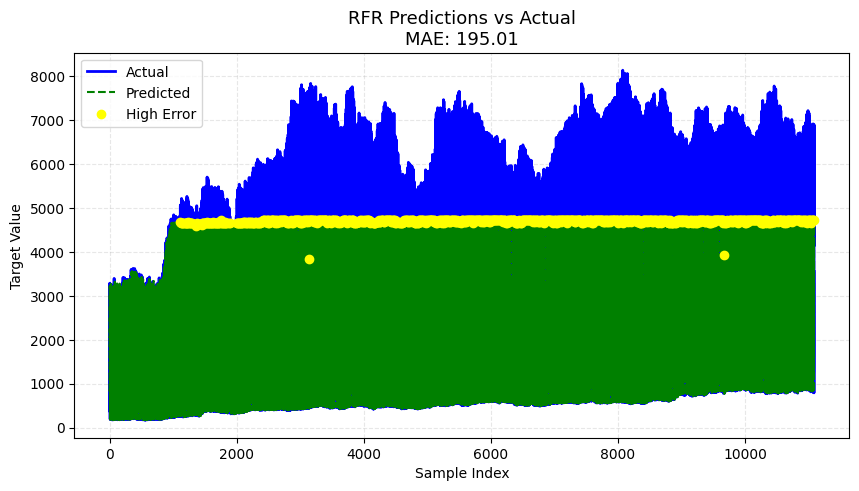

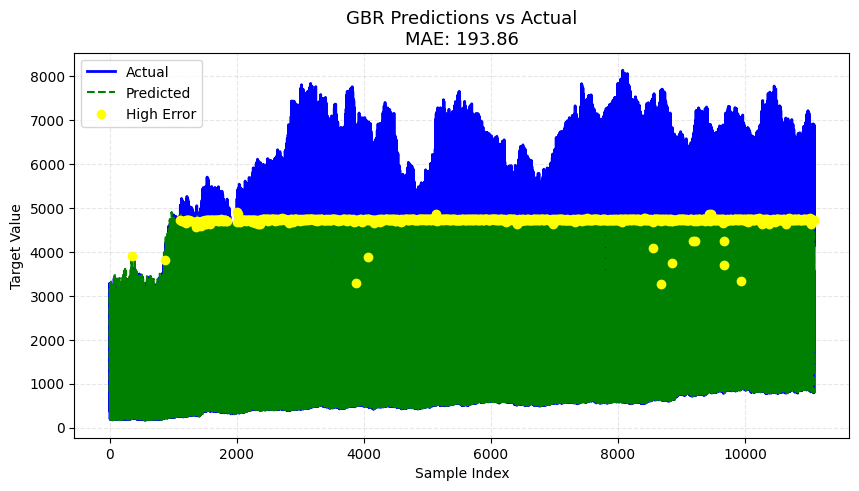

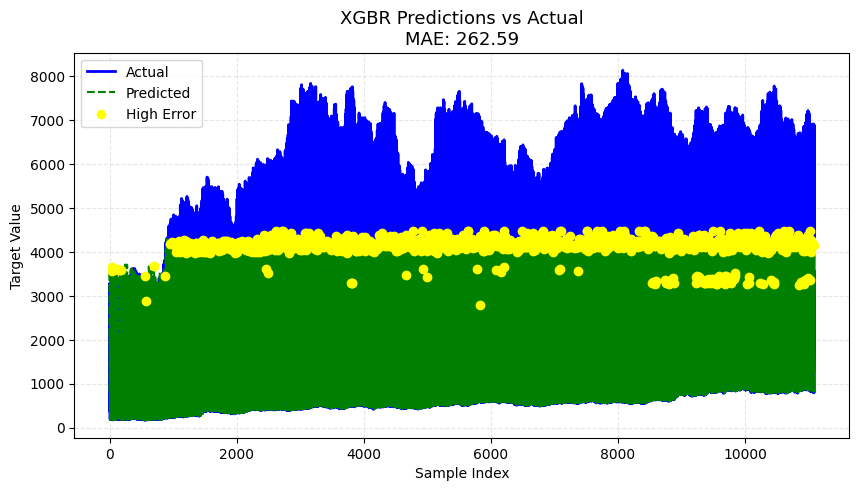

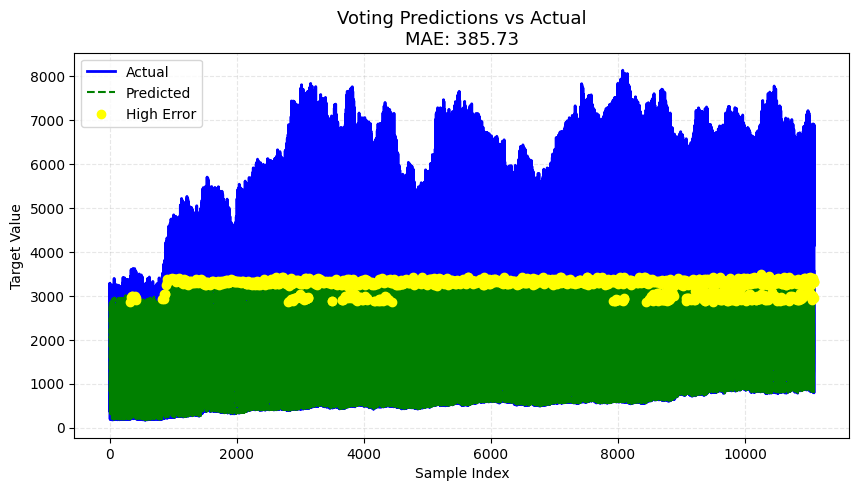

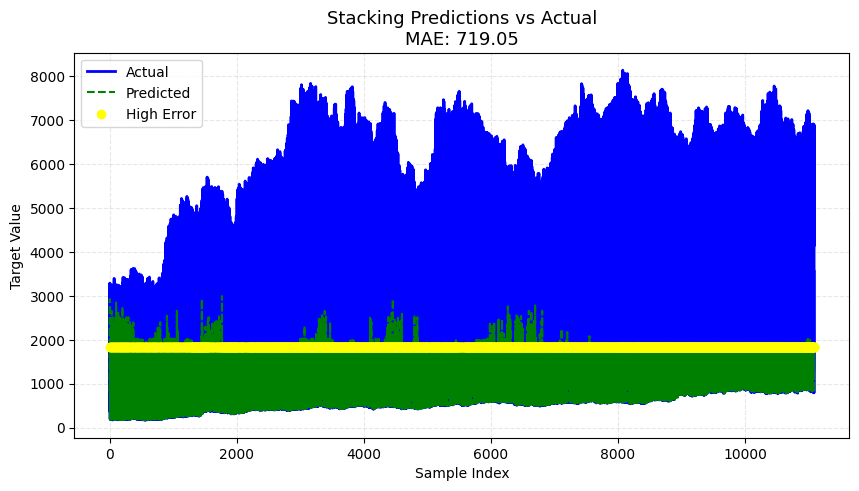

In [23]:

# Ensure Y_test is a NumPy array
actual = np.array(Y_test)

# Create line plots for each model
for index, row in results_df.iterrows():
    model_name = row['Model']
    
    # Flatten predicted values if nested
    predicted_raw = row['Predicted_Values']
    predicted = np.array(predicted_raw).flatten()

    # Check for matching lengths
    if len(predicted) != len(actual):
        print(f"Skipping {model_name} due to length mismatch (Predicted: {len(predicted)}, Actual: {len(actual)}).")
        continue

    # Calculate errors
    errors = np.abs(actual - predicted)
    mae = mean_absolute_error(actual, predicted)
    threshold = 1.5 * mae
    outliers = np.where(errors > threshold)[0]

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(actual, label='Actual', color='blue', linewidth=2)
    plt.plot(predicted, label='Predicted', linestyle='--', color='green')
    plt.scatter(outliers, predicted[outliers], color='yellow', label='High Error', zorder=5)

    plt.title(f'{model_name} Predictions vs Actual\nMAE: {mae:.2f}', fontsize=13)
    plt.xlabel('Sample Index')
    plt.ylabel('Target Value')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    #plt.tight_layout()
    plt.show()


In [24]:
X_train.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [25]:
v_data=pd.read_csv("/kaggle/input/validationdata/Extracted (1).csv",index_col=0)
v_data

X_validate=v_data.drop(columns={"Date","Stock symbol","Tomorrow","Target"})
Y_validate=v_data[["Tomorrow"]]

X_validate=X_validate[X_train.columns]
X_validate

,Open,High,Low,Close,Volume
2,2.420621,2.403895,2.404313,2.401837,-0.801597
2,-0.118928,-0.095393,-0.106814,-0.088200,-0.756753
2,-0.646287,-0.650977,-0.648410,-0.647232,0.525275
2,-0.362837,-0.359580,-0.353989,-0.358981,-0.168947
2,0.666592,0.653918,0.677695,0.667413,-0.855644
...,...,...,...,...,...
60,-0.534884,-0.536136,-0.534956,-0.533541,0.129963
60,-0.156400,-0.152860,-0.146651,-0.146448,-0.761885
60,-0.849966,-0.852905,-0.860222,-0.860616,2.975368
60,2.841312,2.816085,2.760749,2.746359,-0.462732


In [26]:
Y_validate

,Tomorrow
2,8000.100098
2,2506.050049
2,1255.550049
2,1851.349976
2,4073.149902
...,...
60,1506.900024
60,2318.600098
60,796.700012
60,8868.500000


****On comparing , we could clearly see that Gradient Boosting, Random Forest Regressor and XGBRegression are the top 3 models for Stocks prediction****

In [27]:
valid_models = {
    "RFR":rfrSearch.best_estimator_ ,
    "GBR":gbrSearch.best_estimator_ ,
    "XGBR":xgbSearch.best_estimator_
    }

validation_results={}
for name,model in valid_models.items():
  print(f"{name}...")
  Y_valid_pred = model.predict(X_validate)
  Mae = mean_absolute_error(Y_validate, Y_valid_pred)
  Mse = mean_squared_error(Y_validate, Y_valid_pred)
  Rmse = math.sqrt(Mse)
  Mle = mean_squared_log_error(Y_validate, Y_valid_pred)
  r2 = r2_score(Y_validate, Y_valid_pred)
  print(f"MEAN ABSOLUTE ERROR: {Mae}")
  print(f"MEAN SQUARED ERROR: {Mse}")
  print(f"ROOT MEAN SQUARED ERROR: {Rmse}")
  print(f"MEAN SQUARED LOG ERROR: {Mle}")
  print(f"R2 SCORE: {r2}")
  print("-------------------------------------------------------------------\n")
  validation_results[name] = Y_valid_pred.tolist()  # Convert to list to ensure compatibility

# Create DataFrame using from_dict with orient='index'
validation_df = pd.DataFrame.from_dict(validation_results, orient='index', columns=[f'Pred_{i}' for i in range(len(Y_valid_pred))])
validation_df["Validation_Predicted_Values"] = validation_df.values.tolist() # Convert DataFrame values to a list of lists
validation_df = validation_df.reset_index()
validation_df = validation_df[["index", "Validation_Predicted_Values"]]
validation_df.columns = ["Model", "Validation_Predicted_Values"]

RFR...
MEAN ABSOLUTE ERROR: 1592.703310097361
MEAN SQUARED ERROR: 3406266.981179968
ROOT MEAN SQUARED ERROR: 1845.6074829659658
MEAN SQUARED LOG ERROR: 2.289019826500882
R2 SCORE: 0.28225666044561926
-------------------------------------------------------------------

GBR...
MEAN ABSOLUTE ERROR: 1592.1496844124158
MEAN SQUARED ERROR: 3401779.8369034543
ROOT MEAN SQUARED ERROR: 1844.3914543565459
MEAN SQUARED LOG ERROR: 2.2223467775235104
R2 SCORE: 0.283202158240091
-------------------------------------------------------------------

XGBR...
MEAN ABSOLUTE ERROR: 1628.528209912575
MEAN SQUARED ERROR: 3727972.1555486154
ROOT MEAN SQUARED ERROR: 1930.7957311814773
MEAN SQUARED LOG ERROR: 2.14664511597209
R2 SCORE: 0.2144693297756991
-------------------------------------------------------------------



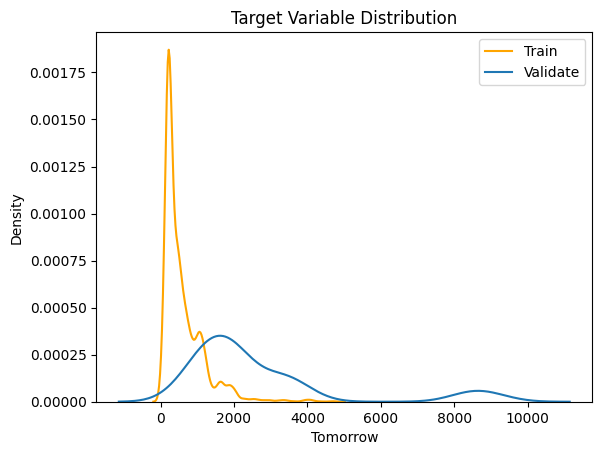

In [28]:

sns.kdeplot(Y_train, label="Train",color="orange")
sns.kdeplot(Y_validate, label="Validate",color="blue")
plt.legend()
plt.title("Target Variable Distribution")
plt.show()
